<a href="https://colab.research.google.com/github/IBM-EPBL/IBM-Project-16739-1659621305/blob/main/Assignments/Team%20Member%201/Kareeshini_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ASSIGNMENT-4

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#2. LOADING DATASET

In [4]:
#import dataset

data = pd.read_csv("Mall_Customers.csv")

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#3.VISUALIZATION



*   . UNIVARIATE



(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <a list of 10 Patch objects>)

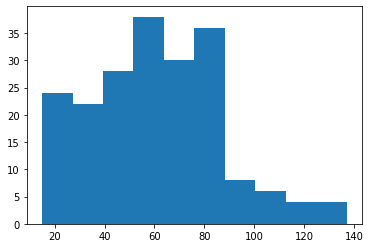

In [6]:
plt.hist(data['Annual Income (k$)'])



*   BIVARIATE



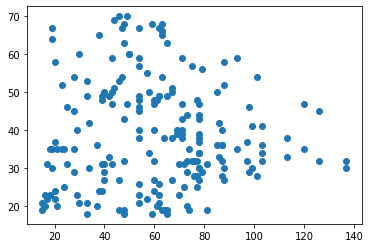

In [7]:
plt.scatter(data['Annual Income (k$)'],data['Age'])



*   MULTIVARIATE



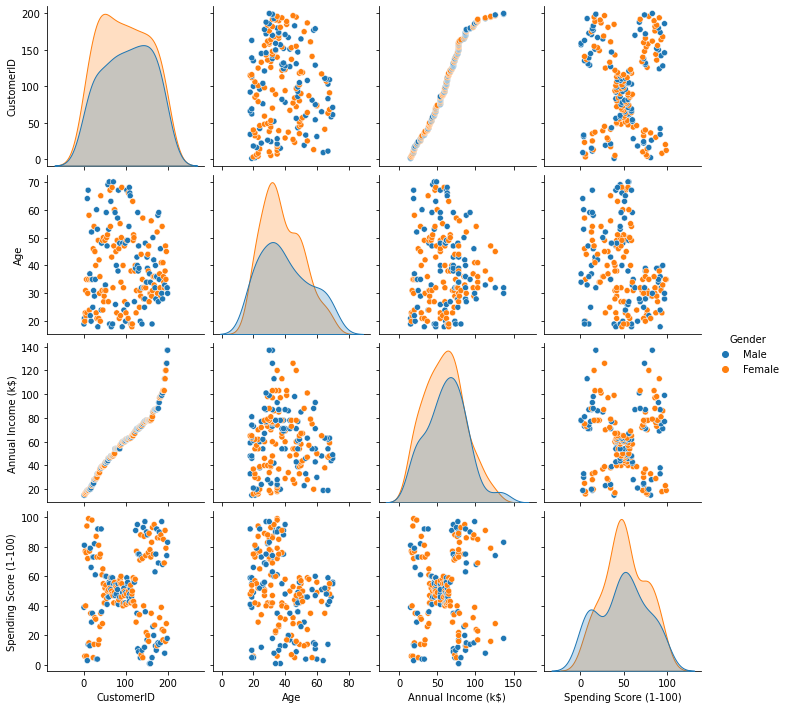

In [8]:
sns.pairplot(data,hue='Gender')

#4.DESCRIPTIVE STATISTICS

In [9]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#5.MISSING VALUE

In [10]:
data.isna().sum() #No missing values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#6.OUTLIERS

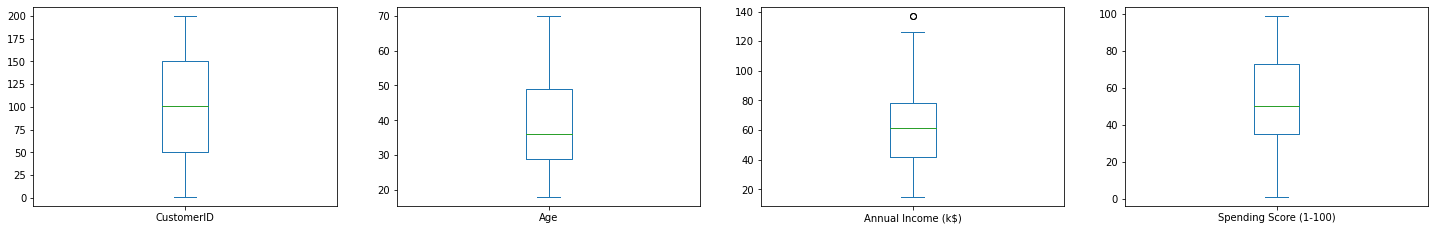

In [11]:
data.plot(kind="box",subplots=True,layout=(7,4),figsize=(25,30));

In [12]:
qnt=data.quantile(q=[0.25,0.75])
qnt

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [13]:
iqr=qnt.loc[0.75]-qnt.loc[0.25] 
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [14]:
lower=qnt.loc[0.25]-(1.5*iqr)
lower

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [15]:
upper=qnt.loc[0.75]+(1.5*iqr)
upper

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [16]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64



*   ANNUAL INCOME(K$)



In [17]:
data['Annual Income (k$)']=np.where(data['Annual Income (k$)']>132.75,60.56,data['Annual Income (k$)'])

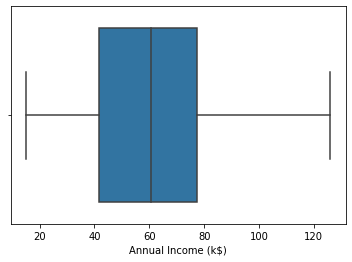

In [18]:
sns.boxplot(x=data['Annual Income (k$)'])

#7.CHECK FOR CATEGORICAL COLUMNS AND PERFORM ENCODING

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [20]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [21]:
df=pd.get_dummies(data,columns=['Gender'])
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15.0,39,0,1
1,2,21,15.0,81,0,1
2,3,20,16.0,6,1,0
3,4,23,16.0,77,1,0
4,5,31,17.0,40,1,0


#8.SCALING THE DATA

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [23]:
mall=sc.fit_transform(df.iloc[:,1:])

mall

array([[0.01923077, 0.        , 0.3877551 , 0.        , 1.        ],
       [0.05769231, 0.        , 0.81632653, 0.        , 1.        ],
       [0.03846154, 0.00900901, 0.05102041, 1.        , 0.        ],
       [0.09615385, 0.00900901, 0.7755102 , 1.        , 0.        ],
       [0.25      , 0.01801802, 0.39795918, 1.        , 0.        ],
       [0.07692308, 0.01801802, 0.76530612, 1.        , 0.        ],
       [0.32692308, 0.02702703, 0.05102041, 1.        , 0.        ],
       [0.09615385, 0.02702703, 0.94897959, 1.        , 0.        ],
       [0.88461538, 0.03603604, 0.02040816, 0.        , 1.        ],
       [0.23076923, 0.03603604, 0.7244898 , 1.        , 0.        ],
       [0.94230769, 0.03603604, 0.13265306, 0.        , 1.        ],
       [0.32692308, 0.03603604, 1.        , 1.        , 0.        ],
       [0.76923077, 0.04504505, 0.14285714, 1.        , 0.        ],
       [0.11538462, 0.04504505, 0.7755102 , 1.        , 0.        ],
       [0.36538462, 0.04504505, 0.

#9.PERFORM CLUSTERING ALGORITHM

In [24]:
from sklearn.cluster import KMeans

In [25]:
TWSS=[]
k=list(range(2,9))

for i in k:
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(mall)
    TWSS.append(kmeans.inertia_)

Text(0, 0.5, 'TWSS')

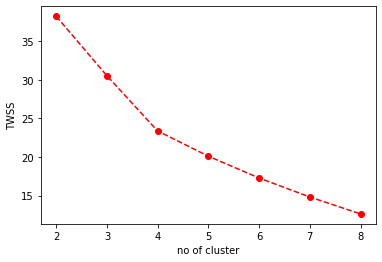

In [26]:
#scree plot

plt.plot(k,TWSS,'ro--')
plt.xlabel('no of cluster')
plt.ylabel('TWSS')

In [27]:
#selecting 4 clusters 

model=KMeans(n_clusters=4)

model.fit(mall)

KMeans(n_clusters=4)

In [28]:
model.labels_

array([2, 2, 0, 3, 3, 3, 0, 3, 1, 3, 1, 3, 0, 3, 1, 2, 0, 2, 1, 3, 1, 2,
       0, 2, 0, 2, 0, 2, 0, 3, 1, 3, 1, 2, 0, 3, 0, 3, 0, 3, 0, 2, 1, 3,
       0, 3, 0, 3, 3, 3, 0, 2, 3, 1, 0, 1, 0, 1, 3, 1, 1, 2, 0, 0, 1, 2,
       0, 0, 2, 3, 1, 0, 0, 0, 1, 2, 0, 1, 3, 0, 1, 2, 1, 0, 3, 1, 0, 3,
       3, 0, 0, 2, 1, 0, 3, 2, 0, 3, 1, 2, 3, 0, 1, 2, 1, 3, 0, 1, 1, 1,
       1, 3, 0, 2, 3, 3, 0, 0, 0, 0, 2, 0, 3, 2, 3, 3, 1, 2, 1, 2, 1, 2,
       3, 3, 1, 3, 0, 2, 1, 3, 0, 2, 3, 3, 1, 2, 1, 3, 0, 2, 1, 2, 0, 3,
       0, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 0, 2, 1, 2, 1, 2, 0, 3,
       1, 2, 1, 2, 0, 3, 1, 3, 0, 2, 0, 2, 0, 3, 0, 3, 1, 3, 0, 3, 0, 2,
       1, 2], dtype=int32)

In [29]:
mb=pd.Series(model.labels_)

# 10.ADD THE CLUSTER DATA WITH THE PRIMARY DATASET

In [30]:
df['clust']=mb

In [31]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,clust
0,1,19,15.0,39,0,1,2
1,2,21,15.0,81,0,1,2
2,3,20,16.0,6,1,0,0
3,4,23,16.0,77,1,0,3
4,5,31,17.0,40,1,0,3


#11.SPLIT THE DATA INTO DEPENDEND AND INDEPENDEND VARIABLES


In [32]:
# dependent variable
y=df['clust'].values
y

array([2, 2, 0, 3, 3, 3, 0, 3, 1, 3, 1, 3, 0, 3, 1, 2, 0, 2, 1, 3, 1, 2,
       0, 2, 0, 2, 0, 2, 0, 3, 1, 3, 1, 2, 0, 3, 0, 3, 0, 3, 0, 2, 1, 3,
       0, 3, 0, 3, 3, 3, 0, 2, 3, 1, 0, 1, 0, 1, 3, 1, 1, 2, 0, 0, 1, 2,
       0, 0, 2, 3, 1, 0, 0, 0, 1, 2, 0, 1, 3, 0, 1, 2, 1, 0, 3, 1, 0, 3,
       3, 0, 0, 2, 1, 0, 3, 2, 0, 3, 1, 2, 3, 0, 1, 2, 1, 3, 0, 1, 1, 1,
       1, 3, 0, 2, 3, 3, 0, 0, 0, 0, 2, 0, 3, 2, 3, 3, 1, 2, 1, 2, 1, 2,
       3, 3, 1, 3, 0, 2, 1, 3, 0, 2, 3, 3, 1, 2, 1, 3, 0, 2, 1, 2, 0, 3,
       0, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 0, 2, 1, 2, 1, 2, 0, 3,
       1, 2, 1, 2, 0, 3, 1, 3, 0, 2, 0, 2, 0, 3, 0, 3, 1, 3, 0, 3, 0, 2,
       1, 2], dtype=int32)

In [33]:
#independent variable

x=df.drop(columns=['clust','CustomerID'],axis=1).values
x

array([[ 19.  ,  15.  ,  39.  ,   0.  ,   1.  ],
       [ 21.  ,  15.  ,  81.  ,   0.  ,   1.  ],
       [ 20.  ,  16.  ,   6.  ,   1.  ,   0.  ],
       [ 23.  ,  16.  ,  77.  ,   1.  ,   0.  ],
       [ 31.  ,  17.  ,  40.  ,   1.  ,   0.  ],
       [ 22.  ,  17.  ,  76.  ,   1.  ,   0.  ],
       [ 35.  ,  18.  ,   6.  ,   1.  ,   0.  ],
       [ 23.  ,  18.  ,  94.  ,   1.  ,   0.  ],
       [ 64.  ,  19.  ,   3.  ,   0.  ,   1.  ],
       [ 30.  ,  19.  ,  72.  ,   1.  ,   0.  ],
       [ 67.  ,  19.  ,  14.  ,   0.  ,   1.  ],
       [ 35.  ,  19.  ,  99.  ,   1.  ,   0.  ],
       [ 58.  ,  20.  ,  15.  ,   1.  ,   0.  ],
       [ 24.  ,  20.  ,  77.  ,   1.  ,   0.  ],
       [ 37.  ,  20.  ,  13.  ,   0.  ,   1.  ],
       [ 22.  ,  20.  ,  79.  ,   0.  ,   1.  ],
       [ 35.  ,  21.  ,  35.  ,   1.  ,   0.  ],
       [ 20.  ,  21.  ,  66.  ,   0.  ,   1.  ],
       [ 52.  ,  23.  ,  29.  ,   0.  ,   1.  ],
       [ 35.  ,  23.  ,  98.  ,   1.  ,   0.  ],
       [ 35.  ,  24.

#12.SPLIT THE DATA INTO TRAINING AND TESTING

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#13.BUILD THE MODEL

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf=RandomForestClassifier()

#14.TRAIN THE MODEL

In [38]:
rf.fit(x_train,y_train)

RandomForestClassifier()

#15.TEST THE MODEL

In [39]:
pred=rf.predict(x_test)

pred

array([1, 1, 1, 1, 2, 1, 3, 1, 0, 0, 2, 3, 0, 0, 1, 3, 2, 1, 3, 1, 3, 2,
       3, 3, 1, 2, 2, 2, 0, 0, 0, 1, 1, 3, 0, 3, 2, 3, 0, 0], dtype=int32)

#16.MEASURE THE PERFORMANCE USING EVALUATION METRICS

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,pred)

0.975

In [41]:
from sklearn import metrics
metrics.confusion_matrix(y_test,pred)

array([[ 9,  0,  0,  0],
       [ 0, 12,  0,  0],
       [ 0,  0,  8,  0],
       [ 1,  0,  0, 10]])